In [114]:
import pandas as pd
import os

# 현재 스크립트 파일의 디렉토리 경로 가져오기
base_dir = os.getcwd()

# 데이터셋 경로 생성
data_one_month_path = os.path.join(base_dir,'dataset', 'Traffic.csv')
data_two_month_path = os.path.join(base_dir,'dataset', 'TrafficTwoMonth.csv')

# 데이터 로드
data_one_month = pd.read_csv(data_one_month_path, encoding='cp949')
data_two_month = pd.read_csv(data_two_month_path, encoding='cp949')


In [115]:
# 데이터 샘플 확인
print(data_one_month.head())
print(data_two_month.head())

# 데이터 정보 확인
print(data_one_month.info())
print(data_two_month.info())


          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 오전    10         Tuesday        31          0         4   
1  12:15:00 오전    10         Tuesday        49          0         3   
2  12:30:00 오전    10         Tuesday        46          0         3   
3  12:45:00 오전    10         Tuesday        51          0         2   
4   1:00:00 오전    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal  
          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        13          2         2   
1  12:15:00 AM    10         Tuesday        14          1         1   
2  12:30:00 AM    10         Tuesday        10          2         2   
3  12:45:00 AM    10         Tuesday       

In [116]:
# 결측치 확인
print(data_one_month.isnull().sum())
print(data_two_month.isnull().sum())



Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64
Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64


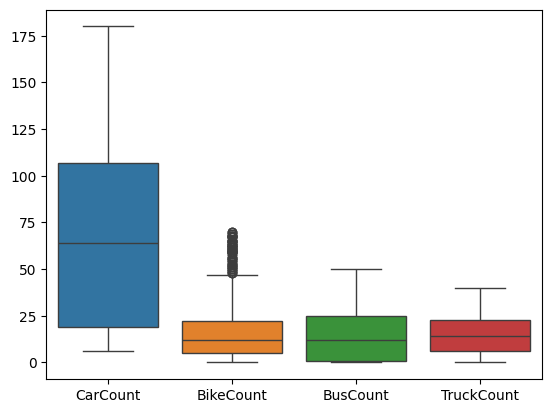

In [117]:
# 이상치 확인
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=data_one_month[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']])
plt.show()


In [118]:
# 이상치 제거: IQR
Q1 = data_one_month['BikeCount'].quantile(0.25)
Q3 = data_one_month['BikeCount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_one_month = data_one_month[(data_one_month['BikeCount'] >= lower_bound) & 
                                (data_one_month['BikeCount'] <= upper_bound)]


In [119]:
# 데이터 기본 통계 요약
print(data_one_month.describe(include='all'))


               Time         Date Day of the week     CarCount    BikeCount  \
count          2899  2899.000000            2899  2899.000000  2899.000000   
unique           96          NaN               7          NaN          NaN   
top     12:00:00 오전          NaN         Tuesday          NaN          NaN   
freq             31          NaN             480          NaN          NaN   
mean            NaN    16.003794             NaN    66.372542    13.735426   
std             NaN     8.943635             NaN    44.078282    10.693420   
min             NaN     1.000000             NaN     6.000000     0.000000   
25%             NaN     8.000000             NaN    19.000000     5.000000   
50%             NaN    16.000000             NaN    62.000000    12.000000   
75%             NaN    24.000000             NaN   105.000000    22.000000   
max             NaN    31.000000             NaN   179.000000    47.000000   

           BusCount   TruckCount        Total Traffic Situation

In [120]:
# 각 열의 데이터 타입 및 고유 값 수 확인
for col in data_one_month.columns:
    print(f"column: {col}")
    print(f"Data type: {data_one_month[col].dtype}")
    print(f"Unique values: {data_one_month[col].nunique()}")
    print(data_one_month[col].unique())
    print("-"*50)

column: Time
Data type: object
Unique values: 96
['12:00:00 오전' '12:15:00 오전' '12:30:00 오전' '12:45:00 오전' '1:00:00 오전'
 '1:15:00 오전' '1:30:00 오전' '1:45:00 오전' '2:00:00 오전' '2:15:00 오전'
 '2:30:00 오전' '2:45:00 오전' '3:00:00 오전' '3:15:00 오전' '3:30:00 오전'
 '3:45:00 오전' '4:00:00 오전' '4:15:00 오전' '4:30:00 오전' '4:45:00 오전'
 '5:00:00 오전' '5:15:00 오전' '5:30:00 오전' '5:45:00 오전' '6:00:00 오전'
 '6:15:00 오전' '6:30:00 오전' '6:45:00 오전' '7:00:00 오전' '7:15:00 오전'
 '7:30:00 오전' '7:45:00 오전' '8:00:00 오전' '8:15:00 오전' '8:30:00 오전'
 '8:45:00 오전' '9:00:00 오전' '9:15:00 오전' '9:30:00 오전' '9:45:00 오전'
 '10:00:00 오전' '10:15:00 오전' '10:30:00 오전' '10:45:00 오전' '11:00:00 오전'
 '11:15:00 오전' '11:30:00 오전' '11:45:00 오전' '12:00:00 오후' '12:15:00 오후'
 '12:30:00 오후' '12:45:00 오후' '1:00:00 오후' '1:15:00 오후' '1:30:00 오후'
 '1:45:00 오후' '2:00:00 오후' '2:15:00 오후' '2:30:00 오후' '2:45:00 오후'
 '3:00:00 오후' '3:15:00 오후' '3:30:00 오후' '3:45:00 오후' '4:00:00 오후'
 '4:15:00 오후' '4:30:00 오후' '4:45:00 오후' '5:00:00 오후' '5:15:00 오후'
 '5:30:00 오

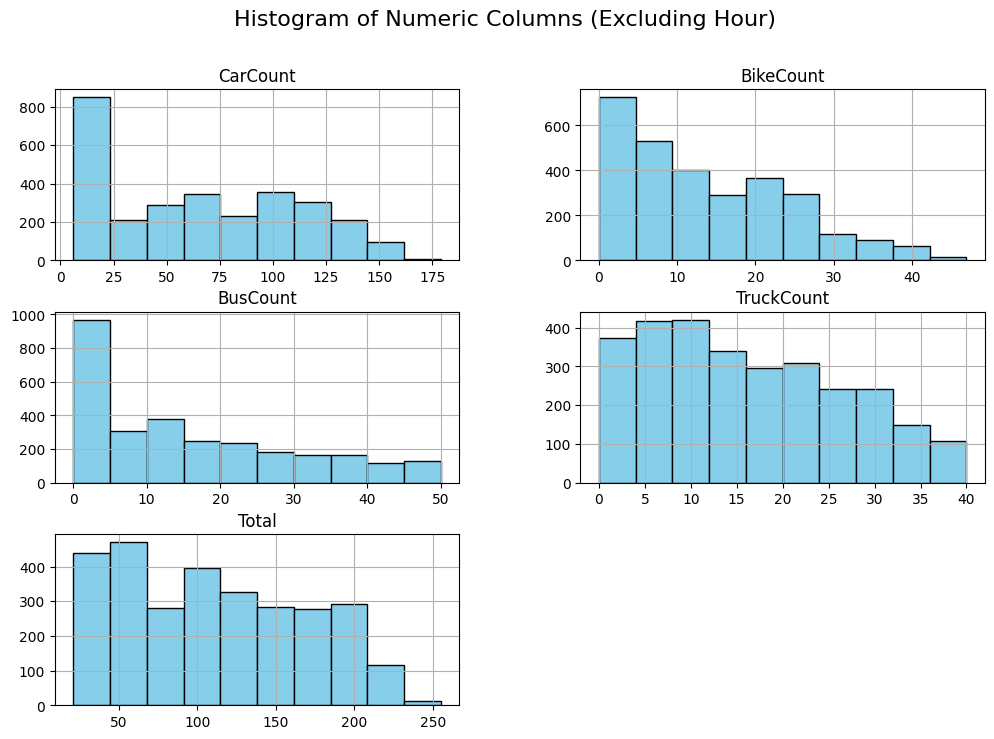

In [121]:
# 데이터 분포 시각화 - 숫자형 데이터
import matplotlib.pyplot as plt
import seaborn as sns

# '오전'과 '오후'를 'AM'과 'PM'으로 변환
data_one_month['Time'] = data_one_month['Time'].str.replace('오전', 'AM')
data_one_month['Time'] = data_one_month['Time'].str.replace('오후', 'PM')

# 숫자형 데이터 선택 (Hour 열 제거)
numeric_columns = data_one_month.select_dtypes(include=['number']).drop(columns=['Date', 'Time_in_minutes', 'Hour'], errors='ignore')

# 숫자형 데이터 히스토그램 시각화
numeric_columns.hist(bins=10, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histogram of Numeric Columns (Excluding Hour)", fontsize=16)
plt.show()



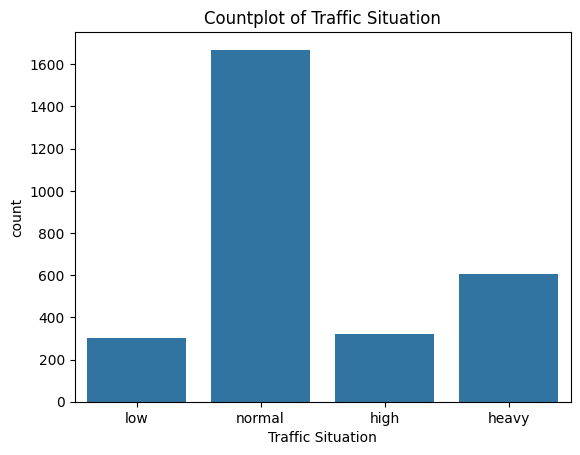

In [122]:
# 범주형 데이터
# 카테고리 순서 재정의
traffic_order = ['low', 'normal', 'high', 'heavy']

# 순서를 Categorical로 설정
data_one_month['Traffic Situation'] = pd.Categorical(
    data_one_month['Traffic Situation'], 
    categories=traffic_order, 
    ordered=True
)

# Countplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data_one_month, x='Traffic Situation', order=traffic_order)
plt.title("Countplot of Traffic Situation")
plt.show()



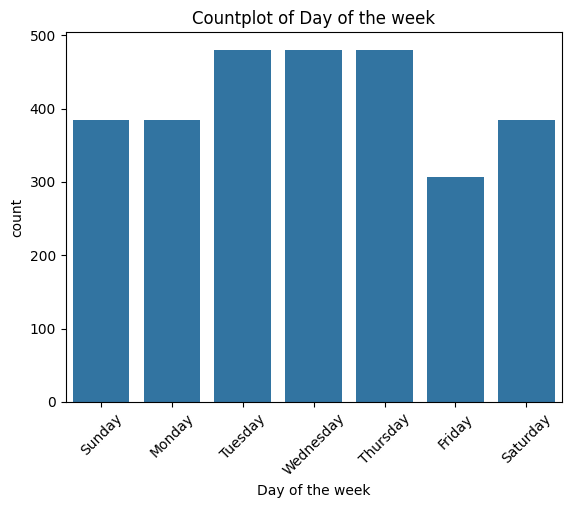

In [123]:
# 요일 순서 재정의
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# 요일 순서 변경
data_one_month['Day of the week'] = pd.Categorical(data_one_month['Day of the week'], categories=weekday_order, ordered=True)

# 요일별 카운트 플롯
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data_one_month, x='Day of the week', order=weekday_order)
plt.title("Countplot of Day of the week")
plt.xticks(rotation=45)
plt.show()


C:\Users\human-01\AppData\Local\Temp\ipykernel_19400\3152228034.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_one_month['Hour'] = pd.to_datetime(data_one_month['Time']).dt.hour


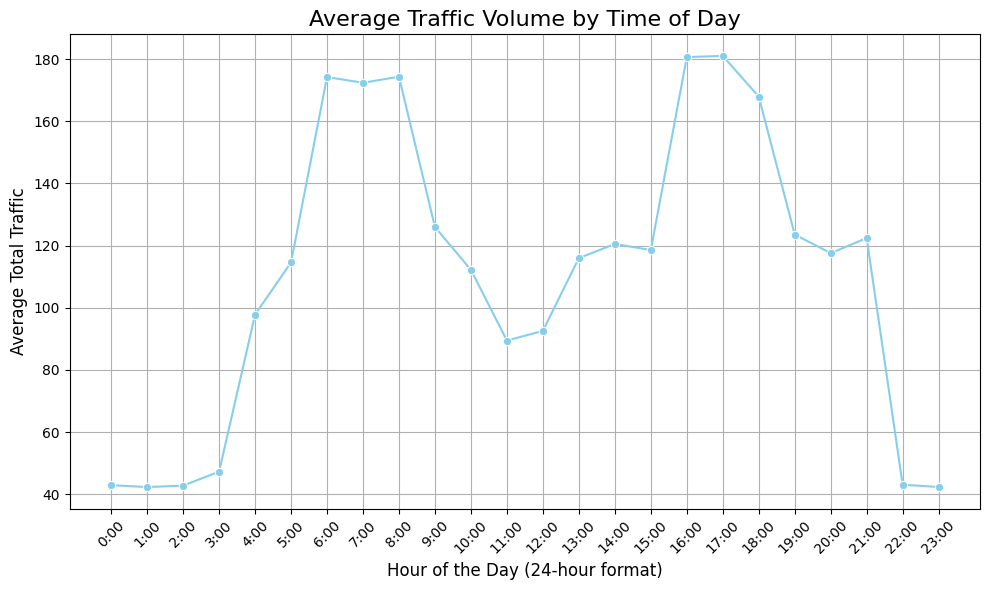

In [126]:
# 시간대별 교통량
# 'Hour' 열 추가 (시간 단위로 변환)
data_one_month['Hour'] = pd.to_datetime(data_one_month['Time']).dt.hour

# 시간대별 평균 총 교통량 계산
hourly_traffic = data_one_month.groupby('Hour')['Total'].mean()

# 시간대별 교통량 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_traffic.index, y=hourly_traffic.values, marker='o', color='skyblue')
plt.title("Average Traffic Volume by Time of Day", fontsize=16)
plt.xlabel("Hour of the Day (24-hour format)", fontsize=12)
plt.ylabel("Average Total Traffic", fontsize=12)
plt.xticks(ticks=range(0, 24), labels=[f"{i}:00" for i in range(0, 24)], rotation=45)  
plt.grid()
plt.tight_layout() 
plt.show()


C:\Users\human-01\AppData\Local\Temp\ipykernel_19400\4096859474.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_weekday_traffic = data_one_month.groupby(['Hour', 'Day of the week'])['Total'].mean().unstack()


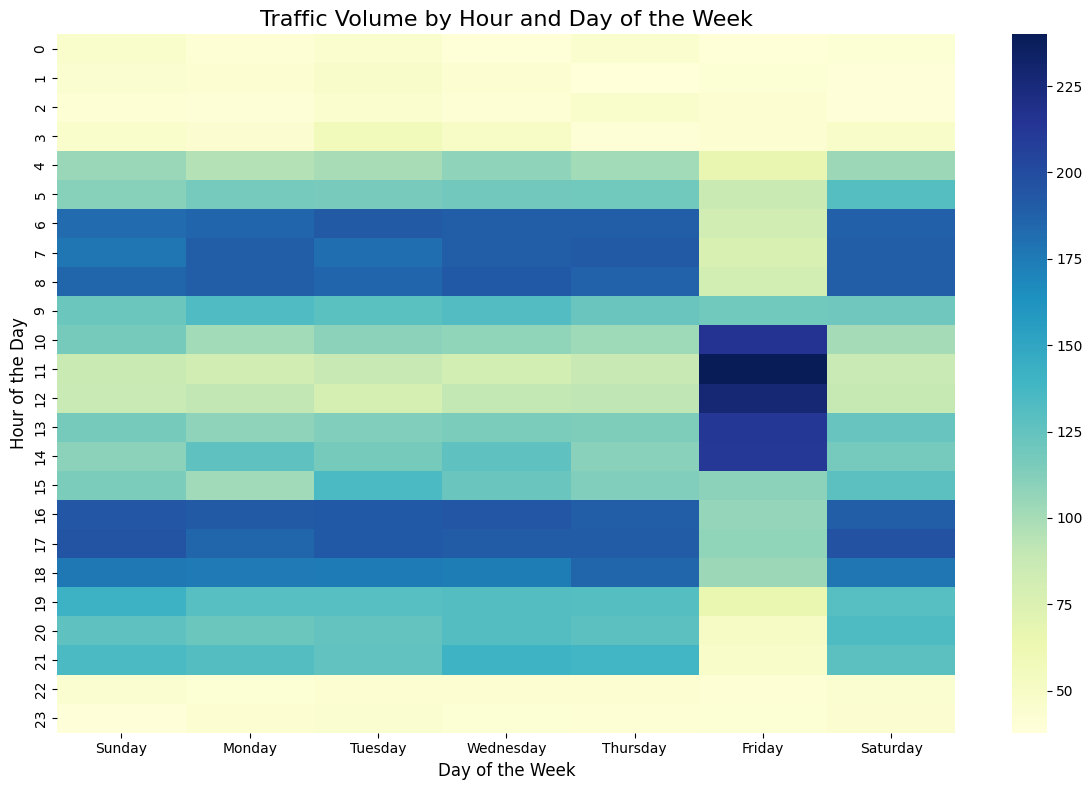

In [129]:
# 시간대와 요일별 교통량 관계
# 시간대와 요일별 교통량 계산
hourly_weekday_traffic = data_one_month.groupby(['Hour', 'Day of the week'])['Total'].mean().unstack()

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_weekday_traffic, cmap="YlGnBu", annot=False)
plt.title("Traffic Volume by Hour and Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Hour of the Day", fontsize=12)
plt.tight_layout()
plt.show()


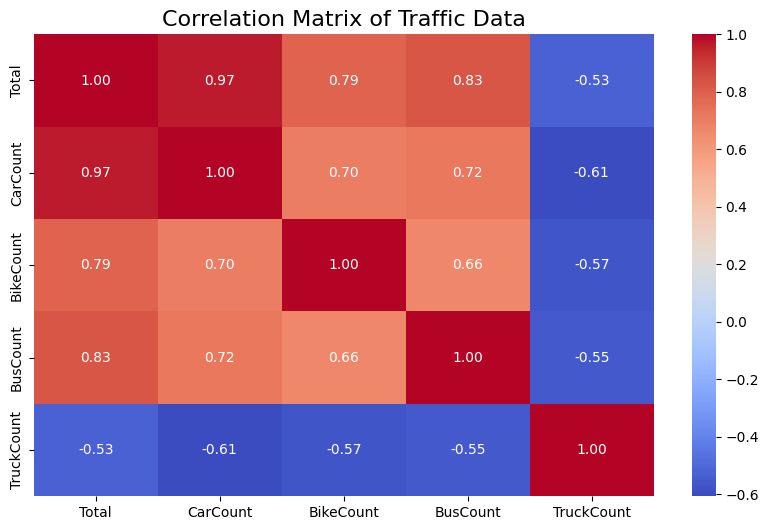

In [127]:
# 상관관계 분석
correlation_matrix = data_one_month[['Total', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount']].corr()

# 히트맵
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Traffic Data", fontsize=16)
plt.show()


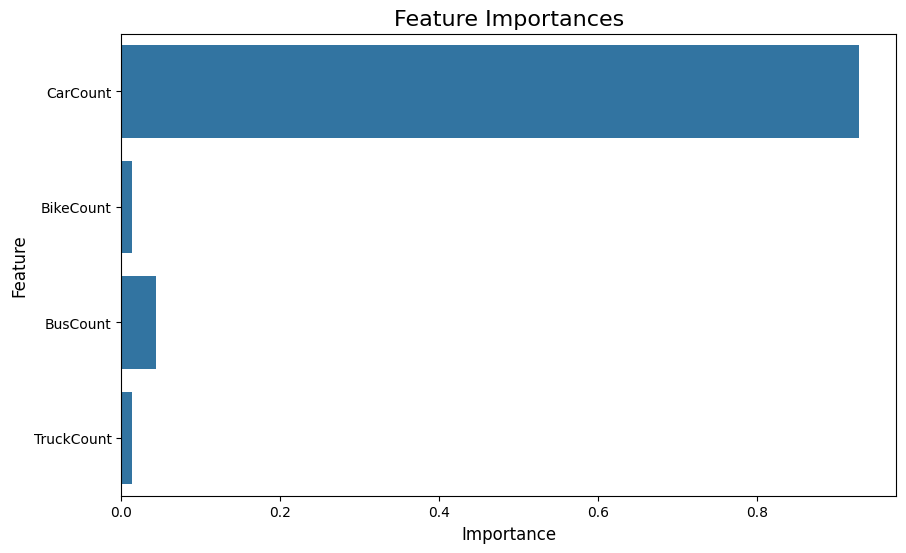

In [131]:
# 변수 중요도 분석
from sklearn.ensemble import RandomForestRegressor

# 독립 변수와 종속 변수
X = data_one_month[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']]
y = data_one_month['Total']

# 랜덤 포레스트 회귀 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 변수 중요도 시각화
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, orient='h')
plt.title("Feature Importances", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()
